In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as colorList

In [22]:

# unzip file
path = '../model_music_word_ch.vec'
# if os.path.exists(path):
#     os.remove(path)

# print('unzip ../'+path[:-3]+'zip')
# os.system('unzip ../'+path[:-3]+'zip')



In [23]:
# loading data and saving as csv file

save_path = './save.csv'
if os.path.exists(save_path):
    os.remove(save_path)
    open(save_path, 'w', encoding='utf_8_sig')


with open(path, 'r',encoding='utf_8_sig') as f:
    for line in f.readlines():
        x = line.split(' ')
        # remove '/n'
        x[-1] = x[-1][:-1]
    
        # print(str(x)[1:-1]
        # build vector
        s = x[0]
        v = x[1:]
        v = [float(i) for i in v]
        x = [s] + v
        # print(str(x)[1:-1])
        with open(save_path, 'a',encoding='utf_8_sig') as f2:
            f2.write(str(x)[1:-1]+'\r')

In [48]:

df = pd.read_csv(save_path, header=None)
train_y , train_x = df.loc[:,0], df.loc[:, 1:]
print(train_x.shape,'\n',  train_y.shape)
train_y = train_y.apply(lambda x : x.replace('\'', ''))
print(train_y)
print(train_x)

(12576, 300) 
 (12576,)
0          捂脸
1          玫瑰
2          呲牙
3        泣不成声
4          鼓掌
         ... 
12571      剑术
12572     猕猴桃
12573      牛马
12574     第四步
12575      基德
Name: 0, Length: 12576, dtype: object
            1         2         3         4         5         6         7    \
0      0.097751 -0.049398  0.039952  0.057798 -0.066623  0.028014  0.084750   
1      0.098590 -0.047761  0.041267  0.058222 -0.069279  0.026805  0.083530   
2      0.098432 -0.048164  0.038433  0.057786 -0.067220  0.027732  0.083999   
3      0.097673 -0.048120  0.038478  0.057021 -0.065624  0.027357  0.082691   
4      0.098693 -0.048256  0.041448  0.056961 -0.068289  0.027185  0.083473   
...         ...       ...       ...       ...       ...       ...       ...   
12571  0.097671 -0.048948  0.039083  0.058089 -0.066978  0.025233  0.084296   
12572  0.097840 -0.048343  0.039007  0.059294 -0.066449  0.027201  0.083564   
12573  0.096689 -0.049274  0.040155  0.058233 -0.066551  0.025478  0.0838

In [49]:
# normalization  mean -> 0

def normal(x):
    m = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - m)/std

train_xm = normal(train_x)

print(train_xm)

            1         2         3         4         5         6         7    \
0      0.240229 -0.265491  0.049848 -0.432823  0.244243  0.659251  0.365820   
1      0.517122  0.391022  0.680820 -0.251654 -0.658214  0.111415 -0.040036   
2      0.464898  0.229357 -0.678735 -0.437952  0.041538  0.531705  0.115977   
3      0.214413  0.247249 -0.657348 -0.764444  0.583818  0.361705 -0.318844   
4      0.550976  0.192558  0.767523 -0.790233 -0.321711  0.283560 -0.058768   
...         ...       ...       ...       ...       ...       ...       ...   
12571  0.213948 -0.084832 -0.367281 -0.308381  0.123720 -0.601478  0.214678   
12572  0.269541  0.157533 -0.403371  0.206262  0.303606  0.290717 -0.028692   
12573 -0.110067 -0.215810  0.147167 -0.247099  0.268955 -0.490231  0.064771   
12574 -0.243775 -0.090339  0.396397  0.184470  0.101844 -0.099975 -0.265921   
12575 -0.316618 -0.059173  0.081493 -0.313770  0.109771  0.021847  0.135027   

            8         9         10   ...       291 

In [50]:
from scipy.spatial.distance import pdist, squareform


def central(K):
    N = K.shape[0]
    one_n = np.ones(N, N)/K

    # centralization
    K = k - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K

def linear(X):
    K = np.dot(X, X.T)
    K = central(K)
    return K

def polynomial(K):
    pass

def gaussianRBF(X, sigma=15):
    pass


def K_PCA(x, num_f, plot=False, info=False, kernal=None):

    # engenvalue and eigenvector
    if kernal == None:
        eigen_w, eigen_v = np.linalg.eig(np.cov(x.T))
    else:
        K = kernal(x)
        eigen_w, eigen_v = np.linalg.eig(K)
        
    print(eigen_v, eigen_w)

    if info:
        print('the number of eigen values: {0} \n \
               the number of eigen vectors{1} \n \
               the size of eingen vectors'. format(eigen_w.shape[0], 
                                                   eigen_v.shape[0],
                                                   eigen_v.shape[1]))

    # sort
    oder = np.argsort(eigen_w)[::-1]

    eigen_w_sorted = eigen_w[oder]
    eigen_v_sorted = eigen_v[:, oder]

    print(eigen_w_sorted)
    # plot X = features, Y = Variance
    if plot:
        # print top 15 features
        pd.DataFrame(eigen_w_sorted[:15]).plot(kind='bar')
    
    if kernal == None:
        v = eigen_v_sorted[:, :num_f]
        x_new = x.dot(v)
    else:
        for i in range(0, num_f):
            eigen_v_sorted[:, i] = eigen_v_sorted[:, i] / np.sqrt(eigen_w_sorted[i])
            eigen_v_sorted = eigen_v_sorted[:, :num_f]
            x_new = K.dot(eigen_v_sorted)


    return x_new


[[-0.08057194  0.06013531 -0.02444404 ... -0.0093593  -0.00927322
  -0.00059294]
 [ 0.08860048  0.01463972  0.00771804 ... -0.11511604  0.15239101
  -0.00366547]
 [ 0.041049    0.07279568  0.02396892 ... -0.06128752 -0.01594543
  -0.03919059]
 ...
 [-0.05857836  0.08707758  0.04585463 ... -0.109787    0.13294711
  -0.01247393]
 [ 0.07111357 -0.07721167  0.01429143 ... -0.02098282  0.0350083
  -0.00737709]
 [-0.02010823  0.0537464   0.05882029 ... -0.05052167 -0.04286937
  -0.02895055]] [7.61238959e+01 3.96486994e+01 1.76917958e+01 1.61528544e+01
 1.38024813e+01 1.33807996e+01 1.26589905e+01 9.66042697e+00
 9.41386239e+00 8.65797446e+00 7.69997595e+00 7.46591379e+00
 7.18074270e+00 5.73970676e+00 5.58806788e+00 3.83230138e+00
 2.98718711e+00 2.87941150e+00 2.19482040e+00 1.65786029e+00
 1.61819035e+00 1.38056034e+00 1.28158511e+00 1.21562478e+00
 1.04450367e+00 8.92514307e-01 7.09476912e-01 6.35689633e-01
 5.81838319e-01 5.08362276e-01 4.36985499e-01 3.99121627e-01
 3.87507905e-01 3.679

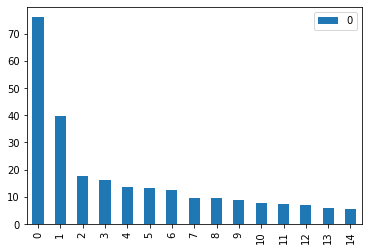

In [51]:
train_xa = K_PCA(train_xm, 1, plot=True, info=True)

In [52]:
## plot
train_xa['word'] = train_y 
print(train_xa)
train_xa.to_csv('./PCA_result.csv', index=False, encoding='utf_8_sig')

              0  word
0     -0.408198    捂脸
1      0.942452    玫瑰
2     -0.819144    呲牙
3     -2.154419  泣不成声
4     -0.101302    鼓掌
...         ...   ...
12571 -0.477394    剑术
12572 -0.147987   猕猴桃
12573 -0.384186    牛马
12574 -0.473164   第四步
12575 -0.003211    基德

[12576 rows x 2 columns]
